In [1]:
# load libraries
from libraries import *

# load data
investor_data = pd.read_pickle('investor_data_step_3.pkl')

In [2]:
investor_data.head(3)

,investor,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier
0,Goldman Sachs,Commit,300,40,2,Market,2,30,0.0,Participant,Bookrunner
1,Deutsche Bank,Decline,1200,140,2,Market,2,115,20.1,Bookrunner,Participant
2,Bank of America,Commit,900,130,3,Market,2,98,24.4,Bookrunner,Bookrunner


# Feature Engineering

* Addtional features can make the algorithm a lot more powerful!
* Really need to use your head to think through how you can engineer new features from the data you've been given
* `Good features` come from `good questions`

In [3]:
# create 'tier_change' series indicating whether investors were promotoed or demoted since last funding round

investor_data['tier_change'] = np.where(
    investor_data['prior_tier'] == investor_data['invite_tier'], 'None', np.where(
        investor_data['prior_tier'] == 'Participant', 'Promoted', 'Demoted')    
    )

investor_data.head(3)

,investor,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier,tier_change
0,Goldman Sachs,Commit,300,40,2,Market,2,30,0.0,Participant,Bookrunner,Promoted
1,Deutsche Bank,Decline,1200,140,2,Market,2,115,20.1,Bookrunner,Participant,Demoted
2,Bank of America,Commit,900,130,3,Market,2,98,24.4,Bookrunner,Bookrunner,None


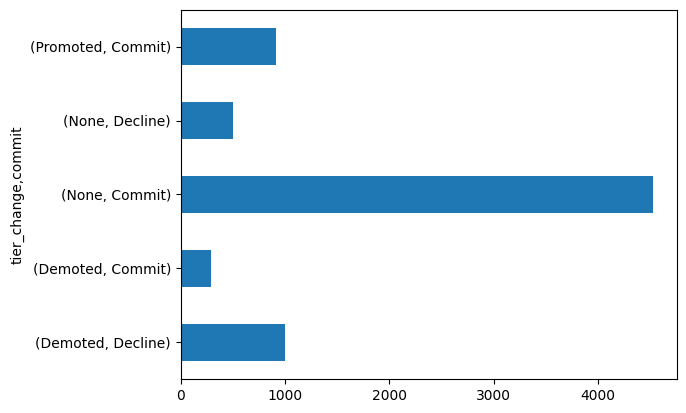

In [4]:
# commit value by tier change

investor_data.groupby('tier_change').commit.value_counts().plot(kind='barh')
plt.show()

In [5]:
# Calculate the median values for Goldman Sachs grouped by 'commit'

investor_data[investor_data['investor'] == 'Goldman Sachs'].groupby('commit').median(numeric_only=True)

,deal_size,invite,rating,covenants,total_fees,fee_share
commit,,,,,,
Commit,1100.0,170.0,3.0,1.5,107.0,14.35
Decline,900.0,100.0,3.0,2.0,68.0,5.65


In [6]:
# create series fee_percent (fee_share/total_fees)

investor_data['fee_percent'] = investor_data['fee_share'] / investor_data['total_fees']

In [7]:
# create series invite_percent (invite/deal_size)

investor_data['invite_percent'] = investor_data['invite'] / investor_data ['deal_size']

In [8]:
investor_data.head(3)

,investor,commit,deal_size,invite,rating,int_rate,covenants,total_fees,fee_share,prior_tier,invite_tier,tier_change,fee_percent,invite_percent
0,Goldman Sachs,Commit,300,40,2,Market,2,30,0.0,Participant,Bookrunner,Promoted,0.000000,0.133333
1,Deutsche Bank,Decline,1200,140,2,Market,2,115,20.1,Bookrunner,Participant,Demoted,0.174783,0.116667
2,Bank of America,Commit,900,130,3,Market,2,98,24.4,Bookrunner,Bookrunner,None,0.248980,0.144444


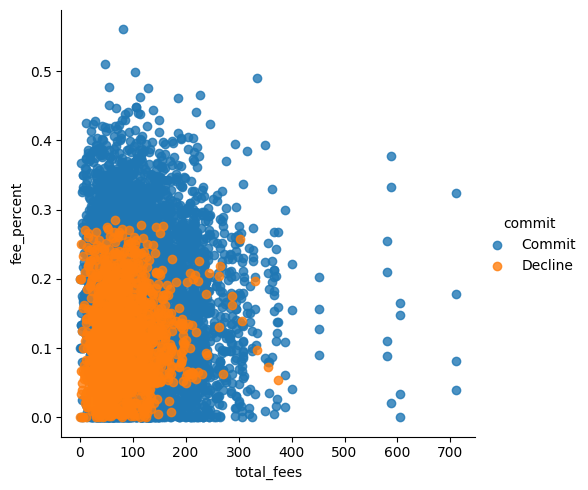

In [9]:
# plot relationships of numerical variables

# fees paid by issuer and share of those fees captured by the investor

sns.lmplot(
    x= 'total_fees', # numeric var 1
    y= 'fee_percent', # numeric var 2
    hue= 'commit', # how to change colour, target variable!
    data= investor_data,
    fit_reg= False
)
plt.show()

Analysis

* investors getting more than 30% of fees never decline
* investors rarely decline transactions where fees exceed $200M
* investors are more likely to commit to big fee-payers where they can collect a large percent of the fees

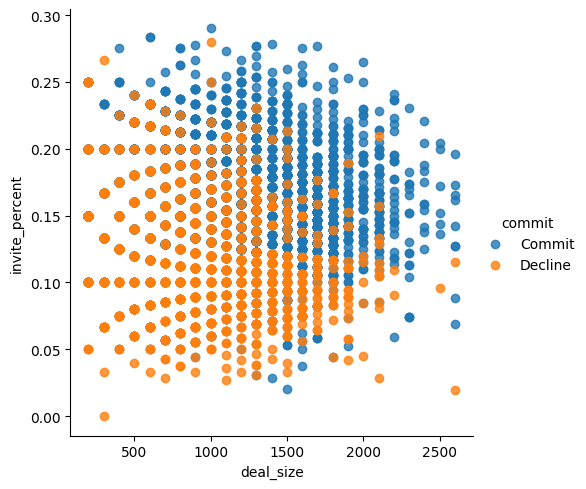

In [10]:
# deal_size and invite_percent

# how investors react to deals of various sizes and commiting to contributing larger or smaller shares of these amounts

sns.lmplot(
    x='deal_size',
    y='invite_percent',
    data=investor_data,
    hue='commit',
    fit_reg=False
)
plt.show()

In [11]:
# export data for next step
investor_data.to_pickle('investor_data_step_4.pkl')